# Perceptron 
#### (Artificial Neuron)

- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy   
(-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding **Vectorization**,  
  writing efficient Code   
  without using for loop!  
- What is the meaning of "Linear Classifier"?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

## Generation of the data set 

In [3]:
# make_blobs?


In [20]:
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


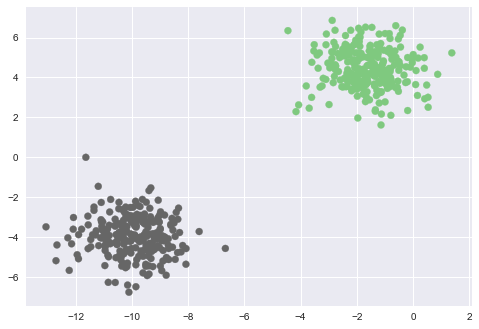

In [27]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()


## Model and helper functions

In [28]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))


## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss 
- Make the Preditctions

In [35]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    lo = []
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            lo.append(l)
#             print("Epoch %d Loss %.4f"%(epoch,l))
    return weights,lo
    

In [36]:
weights,lo = train(X,Y,learning_rate=0.8,maxEpochs=1000)

In [37]:
print(lo)

[0.038435574467731146, 0.009448427334046196, 0.004823481604164004, 0.003116792739033847, 0.0022746177886879457, 0.0017841710794897579, 0.0014665675471073293, 0.001245309742426044, 0.0010827912769256394, 0.0009585538218007508, 0.0008605800108395502, 0.0007813740029017131, 0.0007160295309272285, 0.0006612060300817204, 0.0006145529323201324, 0.0005743696222176986, 0.0005393960609079295, 0.0005086791982538204, 0.0004814850765512808, 0.0004572394222920728, 0.0004354865308108702, 0.0004158602070021511, 0.0003980628379033037, 0.00038185006525185593, 0.00036701938719798456, 0.0003534015639135278, 0.00034085405513880555, 0.0003292559510950687, 0.00031850401518669863, 0.00030850956429766263, 0.0002991959870633708, 0.0002904967530303905, 0.0002823538031049424, 0.00027471623877223635, 0.00026753924735291724, 0.0002607832151705307, 0.00025441299139515984, 0.0002483972735253018, 0.00024270809169220917, 0.0002373203737329722, 0.00023221157665161352, 0.00022736137294084396, 0.00022275138246927078, 0.0

 
### Perceptron Implementation - Part-II 
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification

In [45]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [46]:
x1 = np.linspace(-12,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

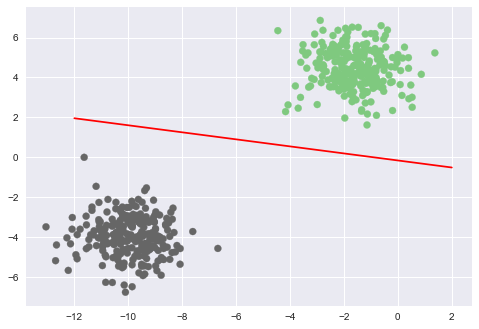

In [48]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [49]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0


## Performing for the nonlinear dataset

In [51]:
make_moons?


In [56]:
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.0, random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


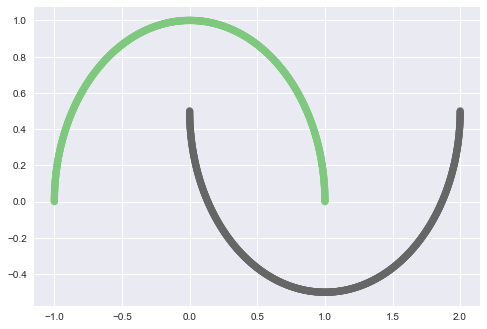

In [57]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

(1000, 2) (1000,)


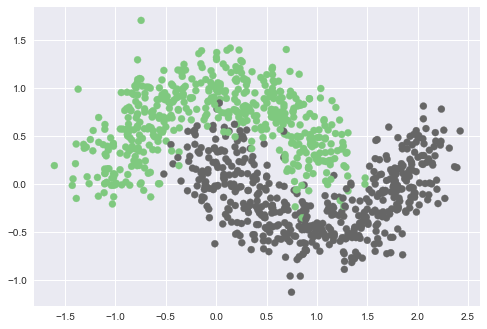

In [59]:
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

In [60]:
weights,lo = train(X,Y,learning_rate=0.8,maxEpochs=1000)

In [64]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

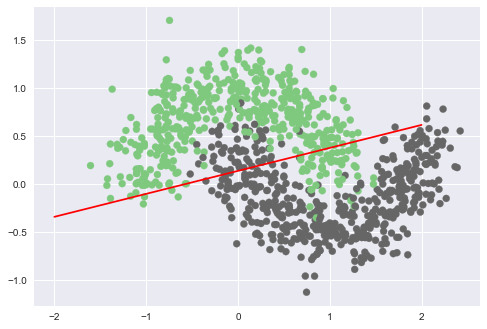

In [65]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [66]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.869


In [67]:
## so in this type of classification it will not work propely so we will use MLP Multi layered perceptron